The purpose of this notebook is to run the same analysis we run in the time_sensitive_modeling py code.
The main diff, is that here we can plot the results and see the figure

In [ ]:
import sys
sys.path.append('/home/isabrah/sustainable_high_quality_wikis')
from modeling.time_sensitive_modeling import expand_dataset_based_promotion_year, sliding_window_dataset_based_promotion_year
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join as opj
import os
import numpy as np
from matplotlib.patches import Rectangle

### Configurations

In [36]:
model_version = 20.2 #20.2 #10.2
years_lag = 1
initial_years_to_include=3
use_bootstrap=True # relevant only for option A below
save_results=True
saving_path = opj('/shared/3/projects/relationship-aware-networks-wikipedia/models', 'models_analysis', str(model_version))

## OPTION A: Running the expand_dataset_based_promotion_year function (Long run!)

In [37]:
eval_measures_over_years = expand_dataset_based_promotion_year(model_version=model_version, years_lag=years_lag, initial_years_to_include=initial_years_to_include, use_bootstrap=use_bootstrap)

Max year filter has been applied over the whole dataset. Filtered dataset shape: (33025, 331).
About to start looping over the following max years: [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019].
Max year filter has been applied. Max year in the data: 2007. Filtered dataset shape: (2950, 331).
Multiprocessing of 100 folds starts now. Wish me luck!


Process ForkPoolWorker-58:
Process ForkPoolWorker-65:
Process ForkPoolWorker-57:
Exception ignored in: <function _releaseLock at 0x7f06121c9940>
Traceback (most recent call last):
  File "/opt/anaconda/lib/python3.11/logging/__init__.py", line 237, in _releaseLock
    def _releaseLock():
    
KeyboardInterrupt: 
Process ForkPoolWorker-60:
Process ForkPoolWorker-43:
Process ForkPoolWorker-52:
Process ForkPoolWorker-62:
Process ForkPoolWorker-45:
Process ForkPoolWorker-75:
Process ForkPoolWorker-54:
Process ForkPoolWorker-7:
Process ForkPoolWorker-68:
Process ForkPoolWorker-71:
Process ForkPoolWorker-66:
Process ForkPoolWorker-56:
Process ForkPoolWorker-67:
Process ForkPoolWorker-76:
Process ForkPoolWorker-74:
Process ForkPoolWorker-63:
Process ForkPoolWorker-51:
Process ForkPoolWorker-59:
Process ForkPoolWorker-70:
Process ForkPoolWorker-64:
Process ForkPoolWorker-72:
Process ForkPoolWorker-77:
Process ForkPoolWorker-61:
Process ForkPoolWorker-41:
Process ForkPoolWorker-2:
Process ForkP

KeyboardInterrupt: 

In [58]:
if save_results:
    # Check whether the specified path exists or not
    folder_exists = os.path.exists(saving_path)
    if not folder_exists:
       # Create a new directory because it does not exist
       os.makedirs(saving_path)
    eval_measures_over_years.to_csv(opj(saving_path, 'expand_dataset_based_promotion_year_data.csv'), index=False)

In [34]:
import pandas as pd
eval_measures_over_years = pd.read_csv(opj(saving_path, 'expand_dataset_based_promotion_year_data.csv'))

In [35]:
eval_measures_over_years.head()

,max_year,n,minority_class_perc,train_mean_macro_f1,train_std_macro_f1,train_ci_macro_f1,train_mean_binary_f1,train_std_binary_f1,train_ci_binary_f1,train_mean_auc,train_std_auc,train_ci_auc,test_mean_macro_f1,test_std_macro_f1,test_ci_macro_f1,test_mean_binary_f1,test_std_binary_f1,test_ci_binary_f1,test_mean_auc,test_std_auc,test_ci_auc
0,2005,376,0.343085,0.997858,0.002771,"(0.992, 1.003)",0.996994,0.002589,"(0.992, 1.002)",0.999963,0.000070,"(1.0, 1.0)",0.620721,0.059740,"(0.502, 0.739)",0.767510,0.037209,"(0.694, 0.841)",0.702135,0.053737,"(0.596, 0.809)"
1,2006,947,0.305174,0.938064,0.009037,"(0.92, 0.956)",0.935013,0.007008,"(0.921, 0.949)",0.985455,0.003708,"(0.978, 0.993)",0.589246,0.038447,"(0.513, 0.666)",0.801306,0.017000,"(0.768, 0.835)",0.633004,0.040478,"(0.553, 0.713)"
2,2007,1675,0.436418,0.869998,0.006931,"(0.856, 0.884)",0.888245,0.005573,"(0.877, 0.899)",0.944814,0.004492,"(0.936, 0.954)",0.633813,0.025955,"(0.582, 0.685)",0.713903,0.019046,"(0.676, 0.752)",0.685942,0.026199,"(0.634, 0.738)"
3,2008,2361,0.441338,0.844484,0.004762,"(0.835, 0.854)",0.817564,0.005998,"(0.806, 0.829)",0.924609,0.002849,"(0.919, 0.93)",0.695593,0.018877,"(0.658, 0.733)",0.641404,0.025248,"(0.591, 0.691)",0.767426,0.017955,"(0.732, 0.803)"
4,2009,2869,0.378529,0.841695,0.005031,"(0.832, 0.852)",0.780756,0.007859,"(0.765, 0.796)",0.923134,0.003104,"(0.917, 0.929)",0.715024,0.016451,"(0.682, 0.748)",0.613224,0.024914,"(0.564, 0.663)",0.798244,0.016233,"(0.766, 0.83)"


In [26]:
# normalizing the two features we plot, since the random model differs between folds
eval_measures_over_years['test_mean_binary_f1_norm'] = (eval_measures_over_years['test_mean_binary_f1'] -eval_measures_over_years['minority_class_perc']) / eval_measures_over_years['minority_class_perc'] * 1.0

eval_measures_over_years['test_mean_auc_norm'] = (eval_measures_over_years['test_mean_auc'] - 0.5) / 0.5 * 1.0

### Plotting (with or w/o CIs)

In [27]:
left_axis_measure = 'test_mean_auc_norm'
right_axis_measure = 'test_mean_binary_f1_norm'#'test_mean_binary_f1' #'test_mean_macro_f1

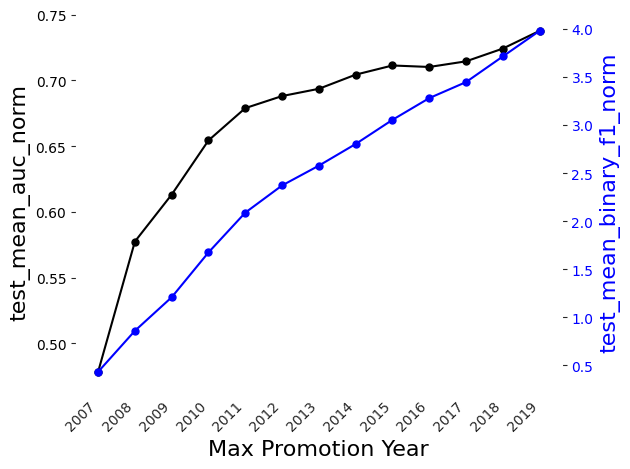

In [28]:
# Plotting with two y-axes
fig, ax1 = plt.subplots()
# Set white background
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')

color = 'black'
ax1.set_ylabel(left_axis_measure, color=color, fontsize=16)
ax1.set_xlabel('Max Promotion Year', color=color, fontsize=16)
ax1.plot(eval_measures_over_years['max_year'], eval_measures_over_years[left_axis_measure], color=color,
         marker='o',  # Marker style
         markersize=5)  # Size of the marker
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(list(eval_measures_over_years['max_year']))
plt.xticks(rotation=45, ha='right')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_facecolor('white')  # Ensure the second axes also has a white background

color = 'blue'
ax2.set_ylabel(right_axis_measure, color=color, fontsize=16)
ax2.plot(eval_measures_over_years['max_year'], eval_measures_over_years[right_axis_measure], color=color,
         marker='o',  # Marker style
         markersize=5)  # Size of the marker)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

# ensure that any x-axis grid is disabled
plt.grid(False)
# if save_results:
#     plt.savefig(opj(saving_path,'expand_dataset_based_promotion_year_data_' + left_axis_measure + '_and_' + right_axis_measure + '.pdf'), format="pdf", bbox_inches="tight", dpi=1200)
#plt.title('Features Articles, English Wikipedia', fontsize=16)
plt.show()

In [29]:
auc_error_bars = [round((1.96*auc_std / np.sqrt(100))/0.5, 2)  for auc_std in eval_measures_over_years.loc[:, 'test_std_auc']]
f1_error_bars = [round((1.96*f1_std / np.sqrt(100))/minority_perc, 2)  for f1_std, minority_perc in zip(eval_measures_over_years.loc[:, 'test_std_binary_f1'],eval_measures_over_years.loc[:, 'minority_class_perc'])]

#auc_error_bars = [round((auc_ci[1] - auc_ci[0])/2.0, 4) for auc_ci in eval_measures_over_years.loc[:, 'test_ci_auc']]
#f1_error_bars = [round((f1_ci[1] - f1_ci[0])/2.0, 4) for f1_ci in eval_measures_over_years.loc[:, 'test_ci_binary_f1']]

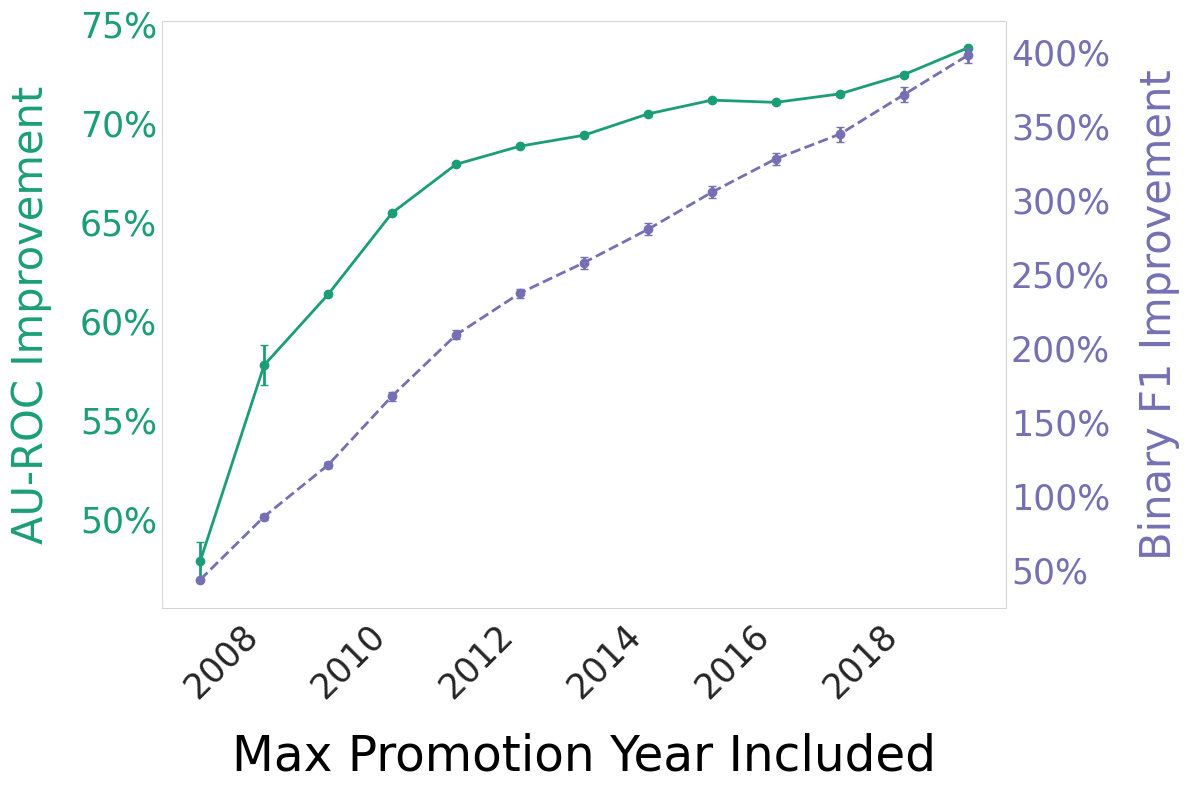

In [31]:
# Plotting with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 8))

# Set white background
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')

# Primary y-axis (AUC)
color = '#1b9e77'#'black'
ax1.set_ylabel('AU-ROC Improvement', color=color, fontsize=30, labelpad=20)
ax1.set_xlabel('Max Promotion Year Included', color='black', fontsize=35, labelpad=20)

# Plot line for AUC
ax1.plot(
    eval_measures_over_years['max_year'], 
    eval_measures_over_years[left_axis_measure], 
    color=color,
    marker='o',  # Marker style
    markersize=3,  # Size of the marker
    linewidth=2, # Adjust the width of the line
    zorder=3  # Increase zorder to ensure it's on top
)

# Add error bars for AUC
ax1.errorbar(
    eval_measures_over_years['max_year'], 
    eval_measures_over_years[left_axis_measure], 
    yerr=auc_error_bars,  # Add the error bars for AUC
    color=color, 
    fmt='o',  # Marker style
    capsize=3,  # Cap size for error bars
    linewidth=2, # Adjust the width of the line
    zorder=3  # Increase zorder to ensure it's on top
)

ax1.tick_params(axis='y', labelcolor=color, labelsize=25, length=0)
ax1.set_xticks(list(eval_measures_over_years['max_year']))

# Format left y-axis as percentage
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y*100)}%'))

# Rotate x-tick labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=25)

# Get the current ticks and labels
ticks = plt.gca().get_xticks()
labels = plt.gca().get_xticklabels()

# Keep every other tick
plt.xticks(ticks[1::2], labels[1::2], rotation=45, ha='right', fontsize=25)

# Secondary y-axis (F1)
ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
ax2.set_facecolor('white')  # Ensure the second axes also has a white background

color = '#7570b3'#'blue'
ax2.set_ylabel('Binary F1 Improvement', color=color, fontsize=30, labelpad=20)

# Plot line for F1
ax2.plot(
    eval_measures_over_years['max_year'], 
    eval_measures_over_years[right_axis_measure], 
    color=color,
    linestyle='--',  # Set the line to be dashed
    marker='o',  # Marker style
    markersize=3,  # Size of the marker
    linewidth=2, # Adjust the width of the line
    zorder=3  # Increase zorder to ensure it's on top
)

# Add error bars for F1
ax2.errorbar(
    eval_measures_over_years['max_year'], 
    eval_measures_over_years[right_axis_measure], 
    yerr=f1_error_bars,  # Add the error bars for F1
    color=color, 
    fmt='o',  # Marker style
    capsize=3,  # Cap size for error bars
    linewidth=2, # Adjust the width of the line
    zorder=3  # Increase zorder to ensure it's on top
)

ax2.tick_params(axis='y', labelcolor=color, labelsize=25, length=0)
# Format left y-axis as percentage
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y*100)}%'))

# Adjust layout
fig.tight_layout()

# Get the position of the axis and create a rectangle only around the plot area
pos = ax1.get_position()

# Create the rectangle that is only around the plot, not the axes or labels
rect = Rectangle(
    (pos.x0, pos.y0), pos.width, pos.height,
    transform=fig.transFigure, color='lightgray', linewidth=0.75, fill=False, zorder=4
)

# Add the rectangle to the figure
fig.patches.append(rect)

# ensure that any x-axis grid is disabled
plt.grid(False)

# saving the plot
# if required to save the fig
if save_results:
    plt.savefig(opj(saving_path,'expand_dataset_based_promotion_year_data_' + left_axis_measure + '_and_' + right_axis_measure + '.pdf'), format="pdf", bbox_inches="tight", dpi=1200)
# Show the plot
plt.show()

## OPTION B: Running the sliding_window_dataset_based_promotion_year function


In [5]:
# there are two options here - with or without the sliding window
move_window = False
eval_measures_over_years = sliding_window_dataset_based_promotion_year(model_version=model_version, years_lag=years_lag,
                                                                       initial_years_to_include=initial_years_to_include, move_window=move_window)

Max year filter has been applied over the whole dataset. Filtered dataset shape: (5814, 331).
About to start looping over the following max years: [2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018].
Max year filter has been applied. Max year in the TRAIN data: 2005. Filtered TRAIN dataset shape: (376, 331).
Process for year 2005 has ended.


Max year filter has been applied. Max year in the TRAIN data: 2006. Filtered TRAIN dataset shape: (947, 331).
Process for year 2006 has ended.


Max year filter has been applied. Max year in the TRAIN data: 2007. Filtered TRAIN dataset shape: (1675, 331).
Process for year 2007 has ended.


Max year filter has been applied. Max year in the TRAIN data: 2008. Filtered TRAIN dataset shape: (2361, 331).
Process for year 2008 has ended.


Max year filter has been applied. Max year in the TRAIN data: 2009. Filtered TRAIN dataset shape: (2869, 331).
Process for year 2009 has ended.


Max year filter has been applied. Max y

/opt/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Process for year 2014 has ended.


Max year filter has been applied. Max year in the TRAIN data: 2015. Filtered TRAIN dataset shape: (5045, 331).


/opt/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Process for year 2015 has ended.


Max year filter has been applied. Max year in the TRAIN data: 2016. Filtered TRAIN dataset shape: (5267, 331).


/opt/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Process for year 2016 has ended.


Max year filter has been applied. Max year in the TRAIN data: 2017. Filtered TRAIN dataset shape: (5589, 331).
minority class in either train/test is zero. Skipping year 2017.
Max year filter has been applied. Max year in the TRAIN data: 2018. Filtered TRAIN dataset shape: (5814, 331).
Process for all years has ended.


/opt/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda/lib/python3.11/site-packages/sklearn/metrics/_class

In [6]:
eval_measures_over_years

,min_year,max_year,train_n,test_n,minority_class_perc_train,minority_class_perc_test,train_macro_f1,train_binary_f1,train_auc,test_macro_f1,test_binary_f1,test_auc
0,2005,2005,376,5438,0.343085,0.165318,0.988285,0.991968,0.999718,0.635158,0.426709,0.760940
1,2005,2006,947,4867,0.305174,0.100267,0.915718,0.920702,0.975353,0.466318,0.227473,0.711051
2,2005,2007,1675,4139,0.436418,0.048804,0.851090,0.874450,0.930080,0.521913,0.146912,0.681964
3,2005,2008,2361,3453,0.441338,0.030119,0.824506,0.796781,0.911445,0.536602,0.093333,0.728174
4,2005,2009,2869,2945,0.378529,0.020374,0.828620,0.760577,0.910231,0.555251,0.114943,0.736571
5,2005,2010,3366,2448,0.327986,0.017157,0.828284,0.748764,0.915233,0.551652,0.038462,0.724503
6,2005,2011,3709,2105,0.299811,0.016152,0.832889,0.743337,0.921244,0.554712,0.046512,0.719019
7,2005,2012,4072,1742,0.275786,0.013203,0.832177,0.726916,0.925194,0.523787,0.000000,0.722033
8,2005,2013,4447,1367,0.254554,0.010241,0.831169,0.715892,0.926419,0.496872,0.000000,0.705812
9,2005,2014,4756,1058,0.239487,0.006616,0.831514,0.707496,0.930273,0.497387,0.000000,0.650129


In [7]:
if save_results:
    saving_path = opj('/shared/3/projects/relationship-aware-networks-wikipedia/models', 'models_analysis', str(model_version))
    # Check whether the specified path exists or not
    folder_exists = os.path.exists(saving_path)
    if not folder_exists:
       # Create a new directory because it does not exist
       os.makedirs(saving_path)
    eval_measures_over_years.to_csv(opj(saving_path, 'sliding_window_dataset_based_promotion_year_' + str(move_window) + '_data.csv'), index=False)

### Plotting

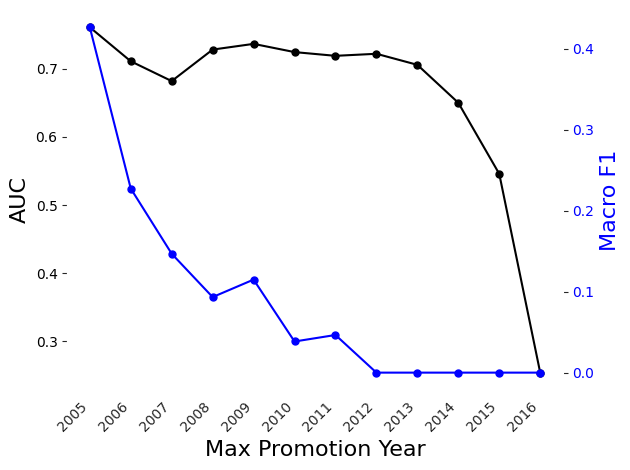

In [8]:
# Plotting with two y-axes
fig, ax1 = plt.subplots()
# Set white background
fig.patch.set_facecolor('white')
ax1.set_facecolor('white')

color = 'black'
ax1.set_ylabel('AUC', color=color, fontsize=16)
ax1.set_xlabel('Max Promotion Year', color=color, fontsize=16)
ax1.plot(eval_measures_over_years['max_year'], eval_measures_over_years['test_auc'], color=color,
         marker='o',  # Marker style
         markersize=5)  # Size of the marker
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(list(eval_measures_over_years['max_year']))
plt.xticks(rotation=45, ha='right')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_facecolor('white')  # Ensure the second axes also has a white background

color = 'blue'
ax2.set_ylabel('Macro F1', color=color, fontsize=16)
ax2.plot(eval_measures_over_years['max_year'], eval_measures_over_years['test_binary_f1'], color=color,
         marker='o',  # Marker style
         markersize=5)  # Size of the marker)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
# ensure that any x-axis grid is disabled
plt.grid(False)
if save_results:
    plt.savefig(opj(saving_path, 'sliding_window_dataset_based_promotion_year_' + str(move_window) + '.pdf'), format="pdf", bbox_inches="tight", dpi=1200)
#plt.title('Features Articles, English Wikipedia', fontsize=16)
plt.show()